In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [3]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.shape

(506, 14)

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [8]:
def create_vif(dataframe):
    vif_table = pd.DataFrame()  # creating empty dataframe
    vif_table['variables'] = dataframe.columns     # add the columns name in the first column of the dataframe
    vif_table['VIF'] = [vif(dataframe.values,i) for i in range(df.shape[1])]   # calculate the VIF of each column and create a VIF column to store the number
    
    return vif_table

create_vif(df)

,variables,VIF
0,CRIM,2.131404
1,ZN,2.910004
2,INDUS,14.485874
3,CHAS,1.176266
4,NOX,74.004269
5,RM,136.101743
6,AGE,21.398863
7,DIS,15.430455
8,RAD,15.369980
9,TAX,61.939713


In [9]:
pca = PCA(n_components=1)
df['new'] = pca.fit_transform(df[['DIS','RAD','INDUS']])
df = df.drop(['DIS','RAD','INDUS'], axis = 1)

In [10]:
print(create_vif(df))

   variables         VIF
0       CRIM    2.006392
1         ZN    2.349186
2       CHAS    1.173519
3        NOX   65.166302
4         RM  133.757986
5        AGE   18.823276
6        TAX   56.391909
7    PTRATIO   77.938234
8          B   21.345554
9      LSTAT   12.580803
10     Price   23.131681
11       new    9.194328


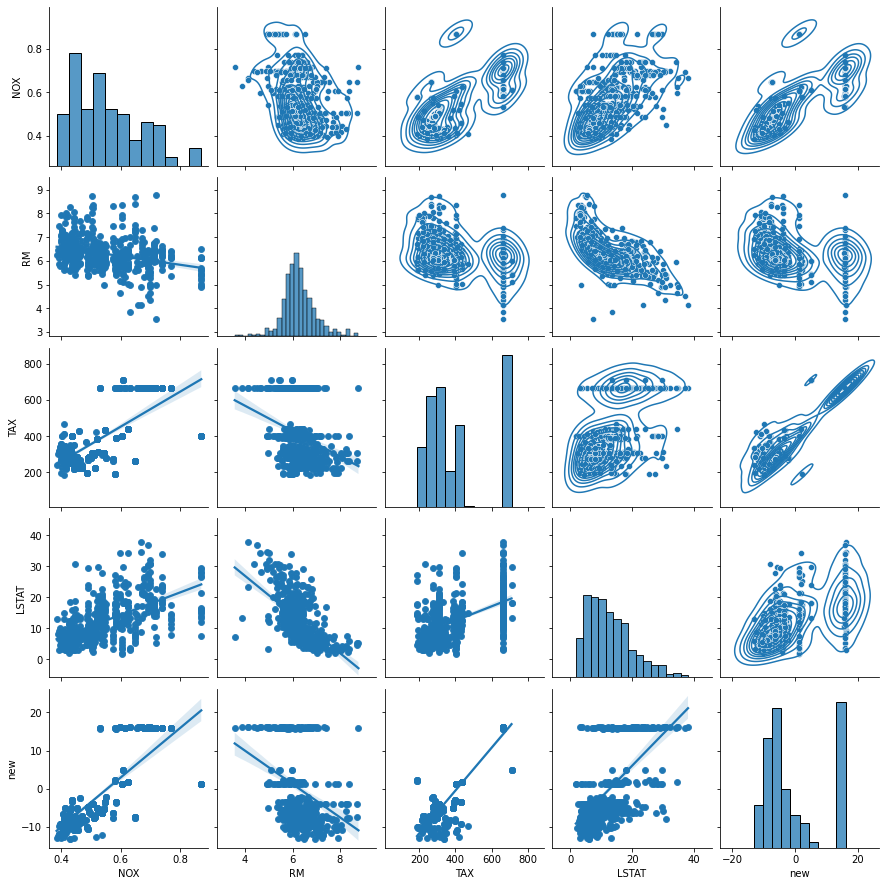

In [11]:
pp = sns.pairplot(df[['NOX','RM','TAX','LSTAT','new']])
pp = pp.map_lower(sns.regplot)
pp = pp.map_upper(sns.kdeplot)

/home/roshanupahdyay/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/roshanupahdyay/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/roshanupahdyay/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/roshanupahdyay/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


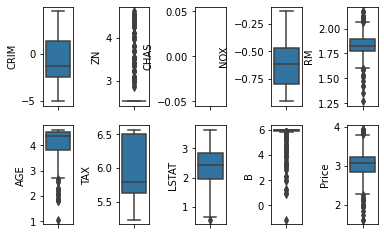

In [12]:
df1 = df.copy()
fig,ax = plt.subplots(2,5)
fig.subplots_adjust(wspace=1.5)

box_plot1 = sns.boxplot(y=np.log(df1[df1.columns[0]]),ax=ax[0][0])
box_plot2 = sns.boxplot(y=np.log(df1[df1.columns[1]]),ax=ax[0][1])
box_plot3 = sns.boxplot(y=np.log(df1[df1.columns[2]]),ax=ax[0][2])
box_plot4 = sns.boxplot(y=np.log(df1[df1.columns[3]]),ax=ax[0][3])
box_plot5 = sns.boxplot(y=np.log(df1[df1.columns[4]]),ax=ax[0][4])
box_plot6 = sns.boxplot(y=np.log(df1[df1.columns[5]]),ax=ax[1][0])
box_plot7 = sns.boxplot(y=np.log(df1[df1.columns[6]]),ax=ax[1][1])
box_plot8 = sns.boxplot(y=np.log(df1[df1.columns[-3]]),ax=ax[1][2])
box_plot9 = sns.boxplot(y=np.log(df1[df1.columns[8]]),ax=ax[1][3])
box_plot10 = sns.boxplot(y=np.log(df1[df1.columns[10]]),ax=ax[1][4])

In [13]:
df = pd.get_dummies(df,columns=['CHAS'],drop_first=True)
X = df.drop(['Price'],axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = Sequential()
model.add(Dense(15,input_dim=11,activation='relu'))
model.add(Dense(1,activation='linear'))

In [16]:
model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [17]:
history = model.fit(X_train, y_train, epochs=200,validation_split=0.2)

2022-04-26 19:31:15.625612: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-26 19:31:15.650092: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2099940000 Hz


Epoch 1/200
11/11 [==============================] - 1s 43ms/step - loss: 586.0697 - mse: 586.0697 - mae: 22.2493 - val_loss: 545.1049 - val_mse: 545.1049 - val_mae: 21.3249
Epoch 2/200
11/11 [==============================] - 0s 12ms/step - loss: 569.2025 - mse: 569.2025 - mae: 21.8914 - val_loss: 537.9183 - val_mse: 537.9183 - val_mae: 21.1515
Epoch 3/200
11/11 [==============================] - 0s 10ms/step - loss: 555.1576 - mse: 555.1576 - mae: 21.6065 - val_loss: 530.7259 - val_mse: 530.7259 - val_mae: 20.9760
Epoch 4/200
11/11 [==============================] - 0s 24ms/step - loss: 532.0418 - mse: 532.0418 - mae: 20.9231 - val_loss: 523.3539 - val_mse: 523.3539 - val_mae: 20.8014
Epoch 5/200
11/11 [==============================] - 0s 15ms/step - loss: 553.3456 - mse: 553.3456 - mae: 21.1202 - val_loss: 515.9670 - val_mse: 515.9670 - val_mae: 20.6323
Epoch 6/200
11/11 [==============================] - 0s 20ms/step - loss: 547.4466 - mse: 547.4466 - mae: 21.2648 - val_loss: 508.

Epoch 48/200
11/11 [==============================] - 0s 11ms/step - loss: 172.4304 - mse: 172.4304 - mae: 11.2776 - val_loss: 184.4505 - val_mse: 184.4505 - val_mae: 12.2775
Epoch 49/200
11/11 [==============================] - 0s 10ms/step - loss: 178.7639 - mse: 178.7639 - mae: 11.5525 - val_loss: 180.1715 - val_mse: 180.1715 - val_mae: 12.1131
Epoch 50/200
11/11 [==============================] - 0s 18ms/step - loss: 158.1847 - mse: 158.1847 - mae: 10.7808 - val_loss: 176.5204 - val_mse: 176.5204 - val_mae: 11.9678
Epoch 51/200
11/11 [==============================] - 0s 15ms/step - loss: 152.6077 - mse: 152.6077 - mae: 10.6107 - val_loss: 173.0218 - val_mse: 173.0218 - val_mae: 11.8242
Epoch 52/200
11/11 [==============================] - 0s 19ms/step - loss: 165.4355 - mse: 165.4355 - mae: 11.1243 - val_loss: 169.2523 - val_mse: 169.2523 - val_mae: 11.6643
Epoch 53/200
11/11 [==============================] - 0s 21ms/step - loss: 161.9629 - mse: 161.9629 - mae: 10.9379 - val_loss

11/11 [==============================] - 0s 16ms/step - loss: 27.3669 - mse: 27.3669 - mae: 3.9714 - val_loss: 30.7744 - val_mse: 30.7744 - val_mae: 4.0270
Epoch 144/200
11/11 [==============================] - 0s 17ms/step - loss: 28.9368 - mse: 28.9368 - mae: 3.9816 - val_loss: 30.4068 - val_mse: 30.4068 - val_mae: 3.9806
Epoch 145/200
11/11 [==============================] - 0s 19ms/step - loss: 28.5322 - mse: 28.5322 - mae: 3.8499 - val_loss: 29.9861 - val_mse: 29.9861 - val_mae: 3.9328
Epoch 146/200
11/11 [==============================] - 0s 22ms/step - loss: 24.2152 - mse: 24.2152 - mae: 3.6120 - val_loss: 29.5556 - val_mse: 29.5556 - val_mae: 3.8836
Epoch 147/200
11/11 [==============================] - 0s 15ms/step - loss: 25.5417 - mse: 25.5417 - mae: 3.5866 - val_loss: 29.1312 - val_mse: 29.1312 - val_mae: 3.8425
Epoch 148/200
11/11 [==============================] - 0s 15ms/step - loss: 30.4180 - mse: 30.4180 - mae: 3.9818 - val_loss: 28.7191 - val_mse: 28.7191 - val_mae: 3

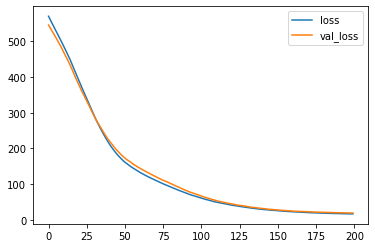

In [19]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'],label='loss')
plt.plot(history_df['val_loss'],label='val_loss')

plt.legend()

In [20]:
model.evaluate(X_test,y_test,batch_size=128)

1/1 [==============================] - 0s 34ms/step - loss: 14.1963 - mse: 14.1963 - mae: 2.7675


[14.196328163146973, 14.196328163146973, 2.76753830909729]

In [21]:
y_pred = model.predict(X_test).flatten()

In [24]:
model = Sequential()
model.add(Dense(15,input_dim=11,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

history = model.fit(X_train,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
11/11 [==============================] - 1s 38ms/step - loss: 616.7636 - mse: 616.7636 - mae: 23.4026 - val_loss: 591.5544 - val_mse: 591.5544 - val_mae: 22.5253
Epoch 2/200
11/11 [==============================] - 0s 13ms/step - loss: 586.6861 - mse: 586.6861 - mae: 22.7402 - val_loss: 586.0642 - val_mse: 586.0642 - val_mae: 22.3965
Epoch 3/200
11/11 [==============================] - 0s 12ms/step - loss: 655.3781 - mse: 655.3781 - mae: 24.0214 - val_loss: 581.5099 - val_mse: 581.5099 - val_mae: 22.2877
Epoch 4/200
11/11 [==============================] - 0s 13ms/step - loss: 607.9524 - mse: 607.9524 - mae: 22.9813 - val_loss: 577.6624 - val_mse: 577.6624 - val_mae: 22.1947
Epoch 5/200
11/11 [==============================] - 0s 14ms/step - loss: 613.9205 - mse: 613.9205 - mae: 23.2040 - val_loss: 574.6103 - val_mse: 574.6103 - val_mae: 22.1214
Epoch 6/200
11/11 [==============================] - 0s 13ms/step - loss: 606.5501 - mse: 606.5501 - mae: 23.0542 - val_loss: 571.

Epoch 48/200
11/11 [==============================] - 0s 8ms/step - loss: 107.5221 - mse: 107.5221 - mae: 8.6338 - val_loss: 114.9634 - val_mse: 114.9634 - val_mae: 8.8849
Epoch 49/200
11/11 [==============================] - 0s 13ms/step - loss: 96.9816 - mse: 96.9816 - mae: 8.3190 - val_loss: 110.7896 - val_mse: 110.7896 - val_mae: 8.6581
Epoch 50/200
11/11 [==============================] - 0s 11ms/step - loss: 120.2762 - mse: 120.2762 - mae: 8.8780 - val_loss: 106.0253 - val_mse: 106.0253 - val_mae: 8.4239
Epoch 51/200
11/11 [==============================] - 0s 12ms/step - loss: 90.4842 - mse: 90.4842 - mae: 7.8238 - val_loss: 100.9275 - val_mse: 100.9275 - val_mae: 8.1326
Epoch 52/200
11/11 [==============================] - 0s 15ms/step - loss: 86.6890 - mse: 86.6890 - mae: 7.5498 - val_loss: 95.8276 - val_mse: 95.8276 - val_mae: 7.8235
Epoch 53/200
11/11 [==============================] - 0s 12ms/step - loss: 90.7694 - mse: 90.7694 - mae: 7.4294 - val_loss: 90.8011 - val_mse: 9

11/11 [==============================] - 0s 10ms/step - loss: 12.6482 - mse: 12.6482 - mae: 2.5044 - val_loss: 19.7392 - val_mse: 19.7392 - val_mae: 2.6708
Epoch 145/200
11/11 [==============================] - 0s 9ms/step - loss: 16.2817 - mse: 16.2817 - mae: 2.6226 - val_loss: 19.7684 - val_mse: 19.7684 - val_mae: 2.7026
Epoch 146/200
11/11 [==============================] - 0s 11ms/step - loss: 11.6289 - mse: 11.6289 - mae: 2.3286 - val_loss: 19.6878 - val_mse: 19.6878 - val_mae: 2.6844
Epoch 147/200
11/11 [==============================] - 0s 16ms/step - loss: 15.4599 - mse: 15.4599 - mae: 2.5394 - val_loss: 19.5942 - val_mse: 19.5942 - val_mae: 2.6620
Epoch 148/200
11/11 [==============================] - 0s 8ms/step - loss: 12.1823 - mse: 12.1823 - mae: 2.3749 - val_loss: 19.5628 - val_mse: 19.5628 - val_mae: 2.6767
Epoch 149/200
11/11 [==============================] - 0s 15ms/step - loss: 12.9780 - mse: 12.9780 - mae: 2.4993 - val_loss: 19.4983 - val_mse: 19.4983 - val_mae: 2.6

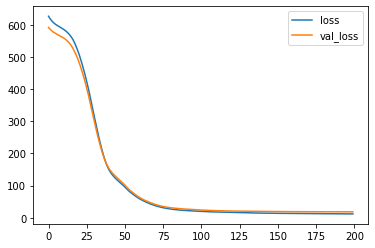

In [25]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'],label='loss')
plt.plot(history_df['val_loss'],label='val_loss')

plt.legend()

In [26]:
model.evaluate(X_test,y_test,batch_size=128)

1/1 [==============================] - 0s 43ms/step - loss: 15.4105 - mse: 15.4105 - mae: 3.0038


[15.410453796386719, 15.410453796386719, 3.003777503967285]

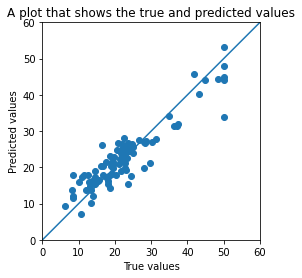

In [28]:
y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test,y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0,60])
plt.ylim([0,60])
plt.plot([0,60],[0,60])